In [25]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [23]:
def lin_func(x):
    return 3 * x + 4

x = torch.linspace(0,1,100)
y_correct = lin_func(x)
y_noisy = y_correct + 0.2 * torch.randn_like(y_correct)

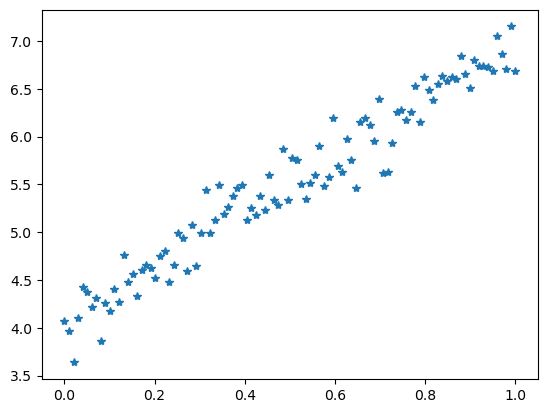

In [24]:
plt.plot(x, y_noisy, "*")

In [190]:
class LinReg(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weight = nn.Parameter(torch.randn((1), requires_grad=True))
        self.bias = nn.Parameter(torch.randn((1), requires_grad=True))
        self.optim = torch.optim.Adam(self.parameters(), lr=0.01)
        self.loss = torch.nn.MSELoss()

    def forward(self, x):
        return x * self.weight + self.bias
    
    def fit(self, x, y, iterations=1000, mode="backward"):
        for i in range(iterations):
            pred = self.forward(x)
            loss = self.loss(pred, y)

            if mode == "backward":
                self.optim.zero_grad()
                loss.backward()
                self.optim.step()

            if mode == "backward_iterator":
                for param in self.parameters():
                    param.grad = torch.zeros_like(param)
                loss.backward()
                with torch.no_grad():
                    for param in self.parameters():
                        param.copy_(param - 0.01 * param.grad)

            if mode == "manual_iterator":
                for param in self.parameters():
                    param.grad = torch.zeros_like(param)
                    grad = torch.autograd.grad(loss.sum(), param, create_graph=True)[0]
                    with torch.no_grad():
                        param.copy_(param - 0.01 * grad)

In [202]:
model = LinReg()

In [221]:
model.fit(x, y_noisy, iterations=1000, mode="manual_iterator")

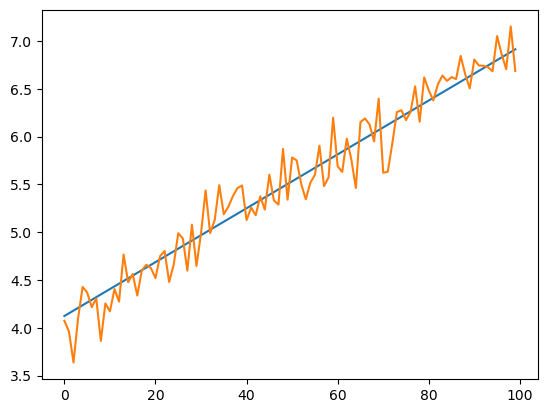

In [222]:
fig, ax = plt.subplots()
plt.plot(model(x).detach().numpy())
plt.plot(y_noisy)